In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix


In [5]:
def process_image(image_path, IMG_SIZE=224):

    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [6]:
images_loc = []
labels = []
for i in os.listdir("Forest Fire Dataset/Training/nofire"):
    images_loc.append(process_image("Forest Fire Dataset/Training/nofire"+"/"+i))
    labels.append(0)
for i in os.listdir("Forest Fire Dataset/Training/fire"):
    images_loc.append(process_image("Forest Fire Dataset/Training/fire"+"/"+i))
    labels.append(1)

In [7]:
classnames = np.array(["nofire", "fire"])
images_loc = np.array(images_loc)
labels = np.array(labels)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_testy, Y_train, Y_testy = train_test_split(images_loc, labels, test_size = 0.1)
X_val, X_test, Y_val, Y_test = train_test_split(X_testy, Y_testy, test_size = 0.2)

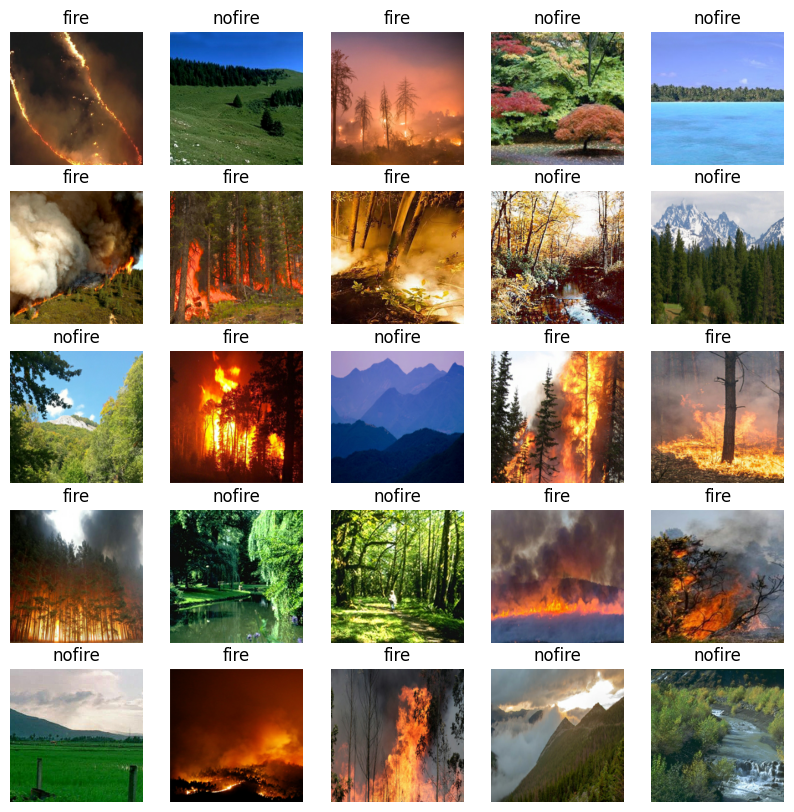

In [9]:
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(classnames[labels[i]])
        plt.axis("off")
show_25_images(X_train, Y_train)

In [10]:
input_shape = (224, 224, 3)  
num_classes = 2
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() 

c:\Users\HET-Pandya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,610 (2.63 MB)

 Trainable params: 688,610 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=2
)

In [31]:
model.fit(x = X_train, 
          y = Y_train,
          epochs=25,
          validation_data = (X_val, Y_val),
          batch_size = 48,
          callbacks=[checkpoint_callback])

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 1.0000 - loss: 2.3381e-06
Epoch 1: val_accuracy did not improve from 0.99174
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 1.0000 - loss: 2.3497e-06 - val_accuracy: 0.9835 - val_loss: 0.0486
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 1.0000 - loss: 1.9185e-06
Epoch 2: val_accuracy did not improve from 0.99174
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 885ms/step - accuracy: 1.0000 - loss: 1.9365e-06 - val_accuracy: 0.9835 - val_loss: 0.0469
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 1.0000 - loss: 1.1863e-06
Epoch 3: val_accuracy did not improve from 0.99174
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 941ms/step - accuracy: 1.0000 - loss: 1.2215e-06 - val_accuracy: 0.9835 - val_loss: 0.0456
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 1.0000 - loss: 1.5974e-06
Epoch 4: val_accuracy did not improve from 0.99174
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 1.6144e

In [37]:
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9355 - loss: 0.5383


[0.5383094549179077, 0.9354838728904724]

In [38]:
if os.path.isfile('model.h5') is False:
    model.save('model.h5')

In [41]:
new_model = load_model('model.h5')
new_model.summary()
new_model.get_weights()
new_model.optimizer

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,612 (2.63 MB)

 Trainable params: 688,610 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\HET-Pandya\AppData\Local\Temp\ipykernel_14236\104011419.py:2: SyntaxWarning: invalid escape sequence '\T'
  test_folder = 'Forest Fire Dataset\Testing'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


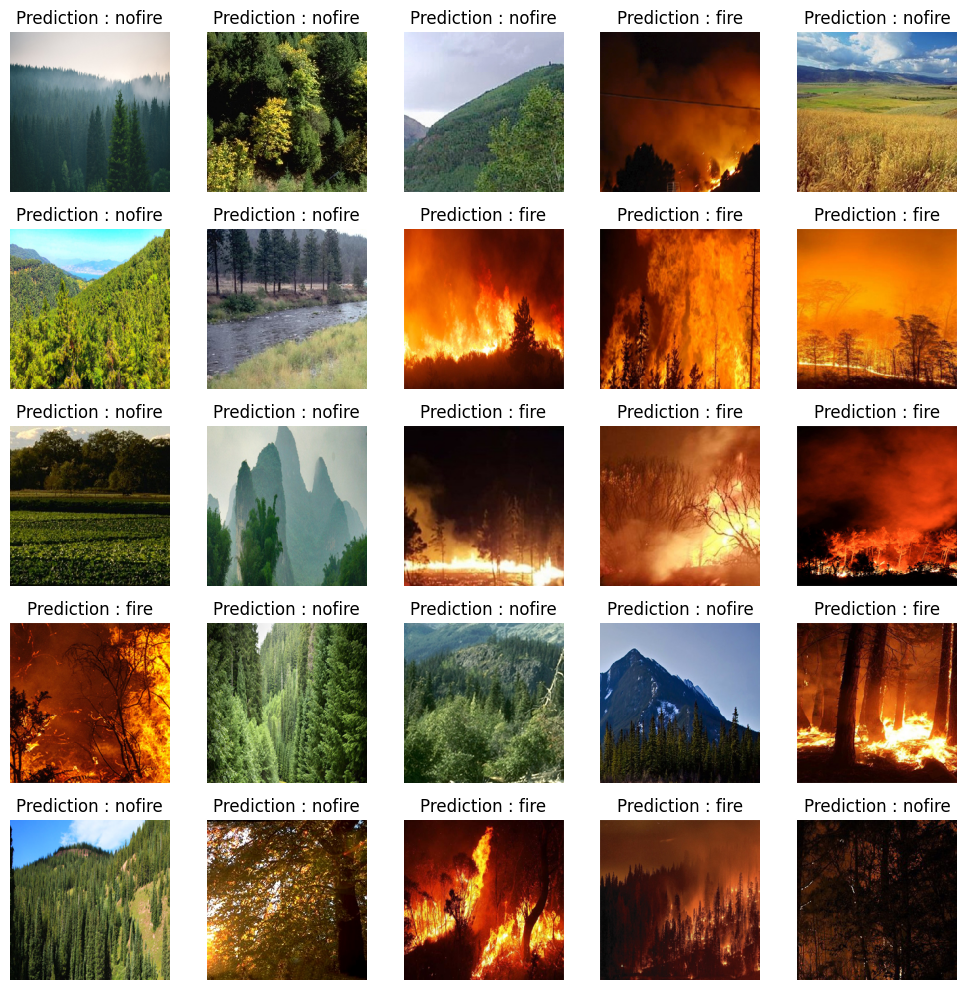

In [34]:
from tensorflow.keras.preprocessing import image
test_folder = 'Forest Fire Dataset\Testing'

image_files = os.listdir(test_folder)

selected_images = np.random.choice(image_files, size=25, replace=False)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, img_file in enumerate(selected_images):
    # Load the image
    img_path = os.path.join(test_folder, img_file)
    img = image.load_img(img_path, target_size=(244, 244))

    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Normalize the image data

    # Make predictions
    predictions = np.argmax(model.predict(img_array))
    # Assuming binary classification, if you have multiple classes, adapt the interpretation accordingly
    

    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"Prediction : {classnames[predictions]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
[[10  2]
 [ 0 19]]


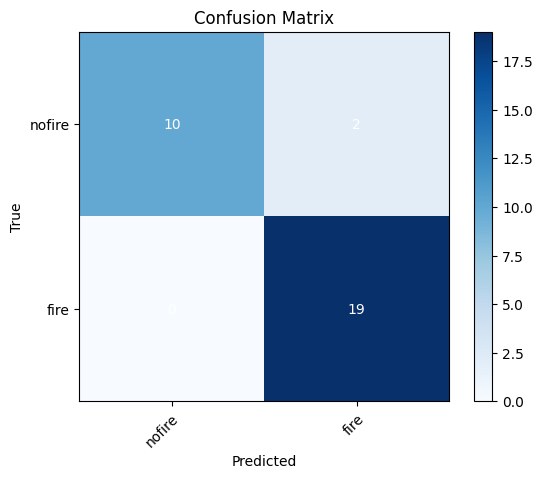

In [45]:
y_pred = np.argmax(new_model.predict(X_test), axis=1)
cm = confusion_matrix(Y_test, y_pred)

print(cm)

confusion_matrix = np.array(cm)

# Define the class names
classnames = np.array(['nofire', 'fire'])

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(classnames)))
ax.set_yticks(np.arange(len(classnames)))
ax.set_xticklabels(classnames)
ax.set_yticklabels(classnames)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(classnames)):
    for j in range(len(classnames)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="w")

# Set title and labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")

# Show the plot
plt.show()
